In [1]:
import json
from time import sleep, time
from functions import *

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
rm = pyvisa.ResourceManager()
lr = rm.list_resources()
for r in lr:
    if "awg" in r:
        AWG = ArbitraryWaveformGenerator(r)
    elif "daq" in r:
        DAQ = DataAcquisition(r)
    elif "172.31.182.32" in r:
        SMU = SourceMeasureUnit(r)
    elif "osc" in r:
        OSC = Oscilloscope(r)

In [4]:
AWG.connect()
DAQ.connect()
SMU.connect()
OSC.connect()

In [5]:
AWG.reset()
SMU.reset()
DAQ.reset()
OSC.reset()

In [6]:
OSC.write("SYST:DISP:UPD 1")
DAQ.set_conn(123)

In [7]:
V, VOLT, n, T_AWG, DCYC_AWG, const_read, read_p, ch_AWG, SRAT_AWG = [1], 1, [10], [10**3], [.1], True, .1, 1, 1e7
wf_AWG = my_wf(V, n, T_AWG, DCYC_AWG, const_read, read_p)
read_V = read_p * VOLT
AWG.set_wf(wf_AWG, SRAT_AWG, VOLT, ch_AWG)

In [8]:
V, VOLT, n, T_SMU, DCYC_SMU, const_read, read_p, ch_SMU, SRAT_SMU, aint = [1, .5], 1, [2, 2], [10**2, 10**2], [.2, .2], True, .1, 1, 1e4, False
wf_SMU = my_wf(V, n, T_SMU, DCYC_SMU, const_read, read_p)
read_V = read_p * VOLT
SMU.set_wf(wf_SMU, SRAT_SMU, VOLT, ch_SMU, aint=aint)

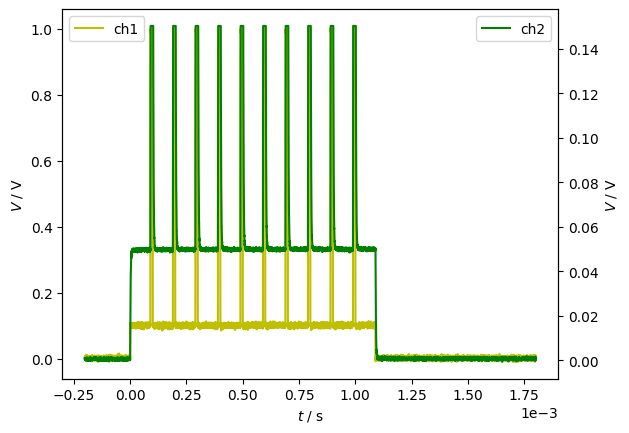

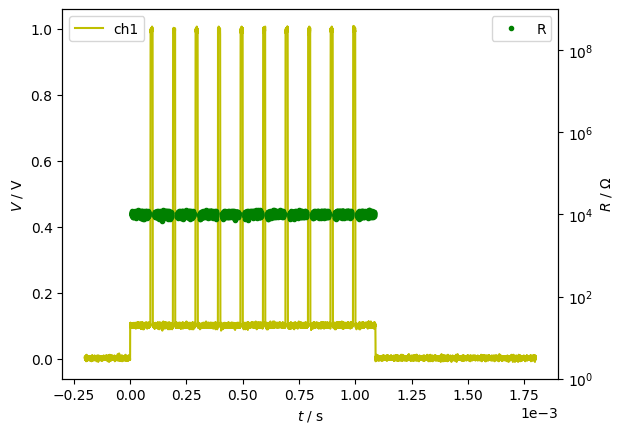

In [9]:
wf, R, valid = meas_AWG(DAQ, 113, AWG, ch_AWG, T_AWG[0], read_V, VOLT, OSC, [1, 2])

In [10]:
meas_AWG_dict = {
    'wf' : wf_AWG,
    'T_len' : T_AWG[0],
    'read_V' : read_V,
    'VOLT' : VOLT,
    'wf' : [wf[i].tolist() for i in range(2)],
    'R_valid' : R[valid].tolist(),
    'valid' : valid.tolist()
}
with open("meas_AWG_dict.json", "w") as json_file:
    json_file.write(json.dumps(meas_AWG_dict))
with open("meas_AWG_dict.json", "r") as json_file:
    meas_AWG_dict = json.load(json_file)

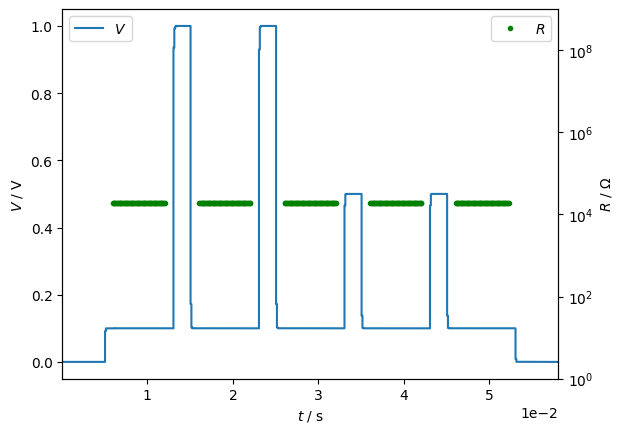

In [11]:
t, V_i, I_o, R, valid = meas_SMU(DAQ, 111, SMU, ch_SMU, T_SMU[0], read_V, VOLT, OSC, [1, 2], aint=aint)

In [12]:
meas_SMU_dict = {
    'wf' : wf_SMU,
    'T_len' : T_SMU[0],
    'read_V' : read_V,
    'VOLT' : VOLT,
    't' : t.tolist(),
    'V_i' : V_i.tolist(),
    'I_o' : I_o.tolist(),
    'R_valid' : R[valid].tolist(),
    'valid' : valid.tolist()
}
with open("meas_SMU_dict.json", "w") as json_file:
    json_file.write(json.dumps(meas_SMU_dict))
with open("meas_SMU_dict.json", "r") as json_file:
    meas_SMU_dict = json.load(json_file)

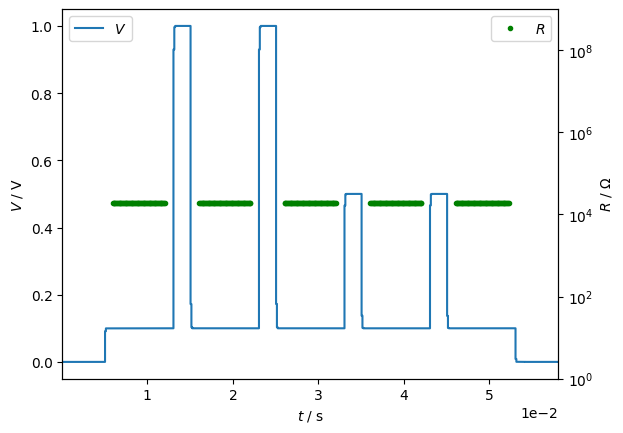

In [13]:
t, V_i, I_o, R, valid = meas_SMU_(DAQ, 111, SMU, ch_SMU, T_SMU[0], read_V, aint=aint)

In [14]:
#IF YOU WANT TO MODIFY AWG PULSES
V, VOLT, n, T_AWG, DCYC_AWG, const_read, read_p, ch_AWG, SRAT_AWG = [1], 1, [1], [10**3], [.1], False, .1, 1, 1e7
wf_AWG = my_wf(V, n, T_AWG, DCYC_AWG, const_read, read_p)
read_V = read_p * VOLT
AWG.set_wf(wf_AWG, SRAT_AWG, VOLT, ch_AWG)

In [15]:
V, VOLT, n, T_SMU, DCYC_SMU, const_read, read_p, ch_SMU, SRAT_SMU, aint = [1], 1, [0], [1], [0], True, .1, 1, 1e4, True
wf_SMU_aint = my_wf(V, n, T_SMU, DCYC_SMU, const_read, read_p)
read_V = read_p * VOLT
SMU.set_wf(wf_SMU_aint, SRAT_SMU, VOLT, ch_SMU, aint=aint)

In [16]:
N = 10
R = meas_AWG_SMU(N, DAQ, AWG, ch_AWG, SMU, ch_SMU, T_SMU[0], read_V)